# Transaction Fraud Detection

This project explores a simulated data set of transactions and trains a random forest classifier to make predictions on new transaction data.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from joblib import dump, load
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

## Data Exploration

In [33]:
transactions = pd.read_csv("fraudTest.csv")
transactions

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [34]:
transactions.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [35]:
category_count = transactions.value_counts('is_fraud')
category_count

is_fraud
0    553574
1      2145
dtype: int64

<AxesSubplot:title={'center':'Occurences of Nonfraudulent (0) vs Fraudulent Transactions (1)'}, xlabel='is_fraud', ylabel='Occurences'>

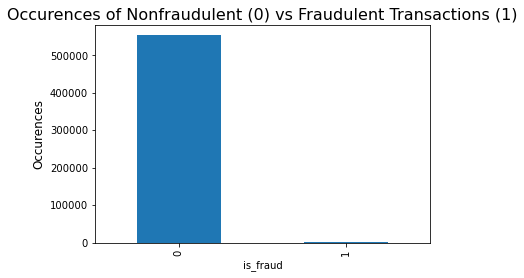

In [36]:
fraud_categories = transactions.value_counts('is_fraud').plot(kind = 'bar')
# plt.xlabel("Is Fraud", fontsize=16)
plt.title("Occurences of Nonfraudulent (0) vs Fraudulent Transactions (1)", fontsize=16)
plt.ylabel("Occurences", fontsize=12)
fraud_categories

In [37]:
type(category_count)
category_count

is_fraud
0    553574
1      2145
dtype: int64

In [38]:
fraudulent_transactions = transactions[transactions['is_fraud']==1]
fraudulent_transactions

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1685,1685,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1
1767,1767,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1
1781,1781,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1
1784,1784,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1
1857,1857,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517197,517197,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.573471,-89.911011,1
517274,517274,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,da7f67d7375f10a054a3d919448c45dd,1387750687,34.091227,-90.390612,1
517341,517341,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,1387751508,34.628434,-90.284780,1
517529,517529,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,1387753563,34.746063,-90.401093,1


# Data Visualizations

In [39]:
state_value_counts = fraudulent_transactions['state'].value_counts()
# type(state_value_counts)
# state_value_counts
# state_value_counts.index

In [40]:
state_value_counts_df = state_value_counts.to_frame()
# state_value_counts_df.columns.values
# state_value_counts_df

In [41]:
state_value_counts_df.rename(columns = {'state': 'targeted customers'}, inplace = True)
state_value_counts_df["state"] = state_value_counts_df.index
# state_value_counts_df

In [42]:
# blues, brwnyl, bupu, purd, purpor, sunset, dense
mapfig = px.choropleth(data_frame = state_value_counts_df, 
                       locations='state', 
                       color='targeted customers', 
                       locationmode="USA-states", 
                       scope="usa", 
                       color_continuous_scale='dense')  
mapfig.show()

Text(0, 0.5, '')

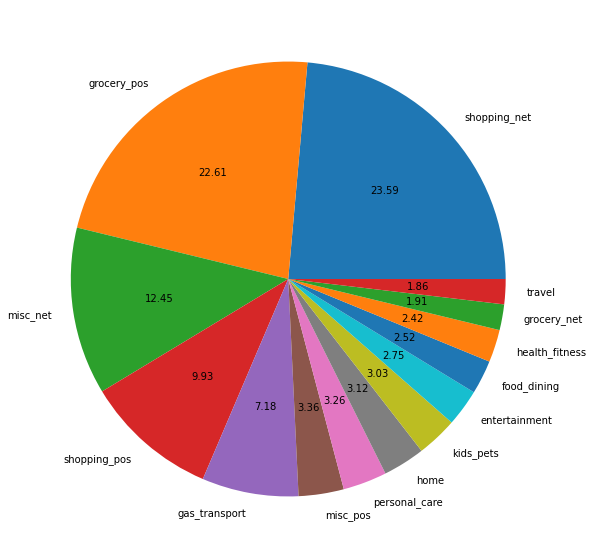

In [43]:
fraudulent_transactions.value_counts('category').plot(kind = 'pie', autopct='%.2f', figsize=(12,10))
plt.ylabel("")

Text(0, 0.5, 'Amount')

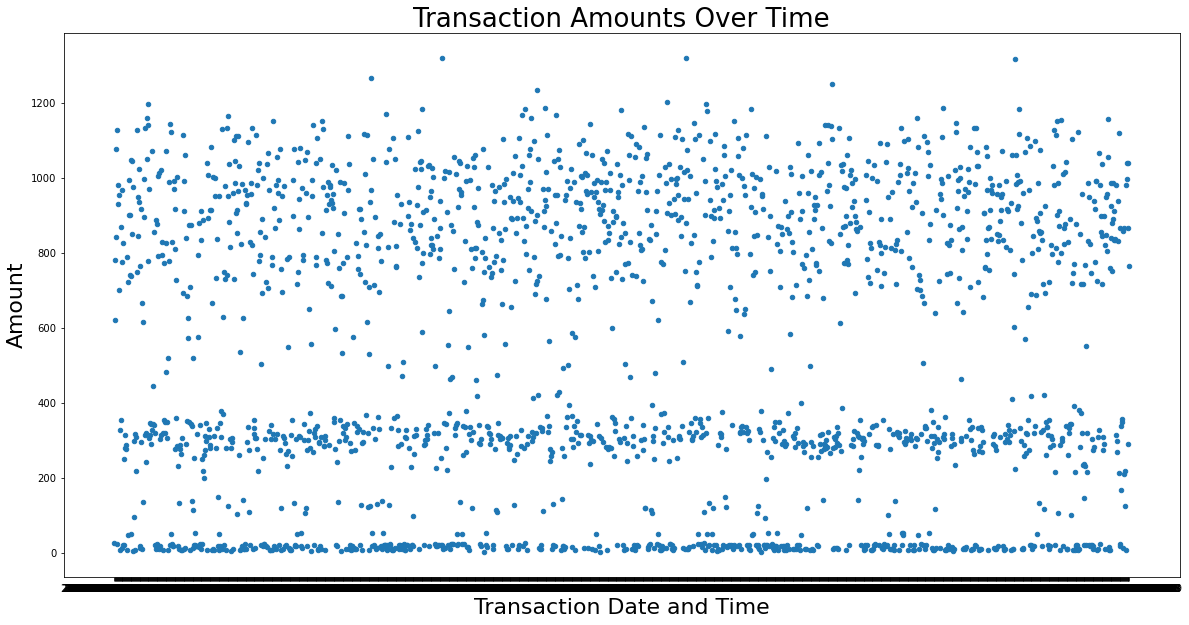

In [44]:
fraudulent_transactions.plot(x='trans_date_trans_time', y='amt', kind='scatter', figsize=(20, 10))
plt.title("Transaction Amounts Over Time", fontsize=26)
plt.xlabel("Transaction Date and Time", fontsize=22)
plt.ylabel("Amount", fontsize=22)

# Balancing the Data

In [45]:
nonfraudulent_transactions = transactions[transactions['is_fraud']==0]
fraudulent_transactions_count = len(transactions[transactions['is_fraud']==1])
# nonfraudulent_transactions
# fraudulent_transactions_count

In [46]:
nonfraudulent_transactions_undersample = nonfraudulent_transactions.sample(n=fraudulent_transactions_count, 
                                                                           replace=False, 
                                                                           random_state=5)
nonfraudulent_transactions_undersample

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
152544,152544,2020-08-13 15:24:26,4634955908138648,"fraud_Langworth, Boehm and Gulgowski",shopping_net,3.26,Mackenzie,Smith,F,7178 Willis Drive,...,41.6414,-96.5232,1745,"Engineer, automotive",1973-12-26,ac47d2f328371e99b70a08e622cb8720,1376407466,41.788936,-96.091658,0
478303,478303,2020-12-14 19:10:07,4681601008538160,fraud_Pfeffer and Sons,shopping_pos,29.83,Tammy,Davis,F,77663 Colleen Freeway,...,39.9148,-80.7310,16183,Physiotherapist,1977-08-12,5b1e49eca3cb5b1d56f29996498e8481,1387048207,40.277959,-79.849311,0
199878,199878,2020-08-30 19:57:07,5501083170975659,"fraud_Kunze, Larkin and Mayert",travel,3.25,Wayne,Payne,M,587 Bradley Inlet Suite 281,...,41.1464,-81.5107,47772,Equities trader,1966-01-04,8c7abde9540550ca80dc60f8ace36ca2,1377892627,40.195414,-81.248342,0
458599,458599,2020-12-10 12:18:59,676369110710,fraud_Ratke and Sons,health_fitness,94.35,David,Wolfe,M,81261 Garcia Underpass Suite 741,...,42.4969,-83.2911,75830,"Engineer, automotive",1974-12-28,618c0fb32215bbae1aef0ab332c2defd,1386677939,42.378830,-83.406294,0
521864,521864,2020-12-24 09:58:20,4512828414983801773,"fraud_Lockman, West and Runte",grocery_pos,126.10,Monica,Cohen,F,864 Reynolds Plains,...,39.8936,-79.7856,328,Tree surgeon,1983-07-25,6b9132bc5af40d2872a3ad9f33369e48,1387879100,39.709514,-80.281836,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140798,140798,2020-08-09 18:50:05,4586260469584,fraud_Yost-Rogahn,personal_care,93.06,Melody,Thompson,F,0362 Anderson Wall,...,40.1362,-95.2138,1631,Architect,1953-01-20,6ad83bb91e353605a160b95a483a1629,1376074205,40.439548,-94.653490,0
498544,498544,2020-12-19 16:54:08,374930071163758,fraud_Fisher Inc,shopping_net,8.46,Daniel,Escobar,M,61390 Hayes Port,...,42.2203,-83.3583,31515,Police officer,1971-11-05,11a2ea731143351730b6c63f39237de5,1387472048,41.799669,-82.821912,0
384685,384685,2020-11-18 03:16:52,6573561108825071,fraud_Schulist Ltd,food_dining,54.88,Kristina,Lewis,F,5449 Brandi Heights Apt. 111,...,36.2395,-95.9596,413574,Bookseller,1968-06-18,48382861f680c09892e7fd6cfac80775,1384744612,36.222899,-96.420284,0
423739,423739,2020-12-02 13:13:24,180036456789979,"fraud_Romaguera, Wehner and Tromp",kids_pets,40.06,Mackenzie,Salazar,F,982 Melissa Lock,...,42.9207,-91.0685,878,Risk analyst,1974-11-20,3f07d42e3d32fa39dd45b10ebc981963,1385990004,43.116340,-91.967805,0


In [47]:
balanced_transactions = pd.concat([fraudulent_transactions, nonfraudulent_transactions_undersample])
balanced_transactions

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1685,1685,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1
1767,1767,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1
1781,1781,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1
1784,1784,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1
1857,1857,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140798,140798,2020-08-09 18:50:05,4586260469584,fraud_Yost-Rogahn,personal_care,93.06,Melody,Thompson,F,0362 Anderson Wall,...,40.1362,-95.2138,1631,Architect,1953-01-20,6ad83bb91e353605a160b95a483a1629,1376074205,40.439548,-94.653490,0
498544,498544,2020-12-19 16:54:08,374930071163758,fraud_Fisher Inc,shopping_net,8.46,Daniel,Escobar,M,61390 Hayes Port,...,42.2203,-83.3583,31515,Police officer,1971-11-05,11a2ea731143351730b6c63f39237de5,1387472048,41.799669,-82.821912,0
384685,384685,2020-11-18 03:16:52,6573561108825071,fraud_Schulist Ltd,food_dining,54.88,Kristina,Lewis,F,5449 Brandi Heights Apt. 111,...,36.2395,-95.9596,413574,Bookseller,1968-06-18,48382861f680c09892e7fd6cfac80775,1384744612,36.222899,-96.420284,0
423739,423739,2020-12-02 13:13:24,180036456789979,"fraud_Romaguera, Wehner and Tromp",kids_pets,40.06,Mackenzie,Salazar,F,982 Melissa Lock,...,42.9207,-91.0685,878,Risk analyst,1974-11-20,3f07d42e3d32fa39dd45b10ebc981963,1385990004,43.116340,-91.967805,0


<AxesSubplot:xlabel='is_fraud'>

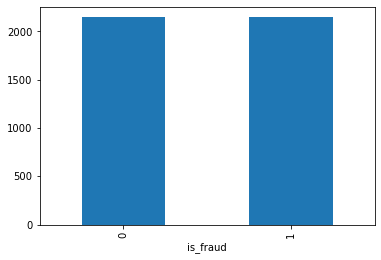

In [48]:
balanced_transactions.value_counts('is_fraud').plot(kind='bar')

In [49]:
balanced_transactions.is_fraud.value_counts()

1    2145
0    2145
Name: is_fraud, dtype: int64

# Selecting Features

In [50]:
X = balanced_transactions.drop(['Unnamed: 0',
                                'trans_date_trans_time', 
                                'first', 'last',
                                'street',
                                'dob',
                                'trans_num',
                                'city', 'city_pop',
                                'unix_time',
                                'is_fraud',
                                'lat', 'long', 
                                'merch_lat', 'merch_long',
                                'zip', 'cc_num', 'job'], axis=1)
y = balanced_transactions['is_fraud']

In [51]:
X

,merchant,category,amt,gender,state
1685,fraud_Hamill-D'Amore,health_fitness,24.84,F,TX
1767,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,M,WI
1781,fraud_Nienow PLC,entertainment,620.33,M,WI
1784,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,M,LA
1857,fraud_Hermann and Sons,shopping_pos,842.65,F,TX
...,...,...,...,...,...
140798,fraud_Yost-Rogahn,personal_care,93.06,F,MO
498544,fraud_Fisher Inc,shopping_net,8.46,M,MI
384685,fraud_Schulist Ltd,food_dining,54.88,F,OK
423739,"fraud_Romaguera, Wehner and Tromp",kids_pets,40.06,F,WI


In [52]:
y

1685      1
1767      1
1781      1
1784      1
1857      1
         ..
140798    0
498544    0
384685    0
423739    0
271424    0
Name: is_fraud, Length: 4290, dtype: int64

# Transforming Categorical Features

In [53]:
categorical_features = ['merchant', 'category', 'gender', 'state']
one_hot = OneHotEncoder(handle_unknown='ignore')
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<4290x749 sparse matrix of type '<class 'numpy.float64'>'
	with 21450 stored elements in Compressed Sparse Row format>

# Random Forest Implementation

In [54]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.3, random_state=5)
clf = RandomForestClassifier(random_state=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Metrics

In [55]:
metrics.confusion_matrix(y_test, y_pred)

array([[632,  22],
       [ 47, 586]], dtype=int64)

In [56]:
metrics.accuracy_score(y_test, y_pred)

0.9463869463869464

In [57]:
clf.score(X_test, y_test)

0.9463869463869464

# Testing Prediction

In [58]:
d = {'merchant': ['fraud_Nienow PLC'], 'category': ['food_dining'], 'amt': [5000], 'gender': ['M'], 'state': ['GA']}

pred_df = pd.DataFrame(data=d)
pred_df

,merchant,category,amt,gender,state
0,fraud_Nienow PLC,food_dining,5000,M,GA


In [59]:
loaded_encoder = load(filename="category_encoder.joblib")
test_pred = loaded_encoder.transform(pred_df)
test_pred

<1x749 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [60]:
clf.predict(test_pred)[0]

1

# Transaction Prediction Widget

In [61]:
# create widget selections
merchants = sorted(transactions.value_counts('merchant').index.tolist())
categories = transactions.value_counts('category').index.tolist()
genders = transactions.value_counts('gender').index.tolist()
states = sorted(transactions.value_counts('state').index.tolist())

# create widgets
merchant_dropdown = widgets.Dropdown(
    options=merchants,
    value=None,
    description='Merchant',
    disabled=False
)

category_dropdown = widgets.Dropdown(
    options=categories,
    value=None,
    description='Category',
    disabled=False    
)

amount_text_box = widgets.Text(
    placeholder='Enter a number',
    description='Amount',
    disabled=False
)

gender_dropdown = widgets.Dropdown(
    options=genders,
    value=None,
    description='Gender',
    disabled=False
)

state_dropdown = widgets.Dropdown(
    options=states,
    value=None,
    description='State',
    disabled=False
)

predict_button = widgets.Button(
    description='Predict Class',
    disabled=False,
    button_style='',
    tooltip='Predict Class'
)

result_label = widgets.Label(
    value='prediction'
)


# function to predict class based on transaction input when button is clicked
def predict_class(x):
    result_label_value = ''
    merchant_value = merchant_dropdown.value
    category_value = category_dropdown.value
    try:
        amount_value = float(amount_text_box.value)        
    except ValueError:
        result_label.value = 'Amount must be a number'
        amount_value = ''

    gender_value = gender_dropdown.value
    state_value = state_dropdown.value
    
    if type(amount_value) == float:        
    
        input_data = {'merchant': [merchant_value], 
                      'category': [category_value], 
                      'amt': [amount_value], 
                      'gender': [gender_value], 
                      'state': [state_value]}
        input_df = pd.DataFrame(data=input_data)

        loaded_encoder = load(filename="category_encoder.joblib")
        transaction_classifier = load(filename="transaction_classifier.joblib")

        encoded_input = loaded_encoder.transform(input_df)
        result = transaction_classifier.predict(encoded_input)

        if result[0] == 0:
            result_label.value = 'This transaction is nonfraudulent (0)'          

        elif result[0] == 1:
            result_label.value = 'This transaction is fraudulent (1)'
#         print(merchant_value)
#         print(category_value)
#         print(amount_value)
#         print(gender_value)
#         print(state_value)
        
    elif type(amount_value) != float:
        result_label.value = "Amount must be a number"

# link function with button event        
predict_button.on_click(predict_class)

# display widgets
display(merchant_dropdown)
display(category_dropdown)
display(amount_text_box)
display(gender_dropdown)
display(state_dropdown)
display(predict_button)
display(result_label)

Dropdown(description='Merchant', options=('fraud_Abbott-Rogahn', 'fraud_Abbott-Steuber', 'fraud_Abernathy and …

Dropdown(description='Category', options=('gas_transport', 'grocery_pos', 'home', 'shopping_pos', 'kids_pets',…

Text(value='', description='Amount', placeholder='Enter a number')

Dropdown(description='Gender', options=('F', 'M'), value=None)

Dropdown(description='State', options=('AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'HI', 'IA',…

Button(description='Predict Class', style=ButtonStyle(), tooltip='Predict Class')

Label(value='prediction')

In [62]:
# %watermark --iversions

